# SA earthquakes by depth

#### First import modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import additional modules:**

In [2]:
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib import colors
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

#### Set path to data:

In [3]:
fp = "/Users/Nellimetiainen/Desktop/SA-earthquakes.csv"

#### Set dataframe and datetime index:

In [4]:
dataFrame = pd.read_csv(fp, parse_dates=True, index_col='time', sep=',')

### Make new columns to organize data by value:

#### Separate columns for different depth categories

In [5]:
dataFrame['Deep'] = dataFrame['depth'].loc[(dataFrame['depth'] >= 300.01) & (dataFrame['depth'] <= 700.00)]
dataFrame['Intermediate'] = dataFrame['depth'].loc[(dataFrame['depth'] >= 70.01) & (dataFrame['depth'] <= 300.00)]
dataFrame['Shallow'] = dataFrame['depth'].loc[(dataFrame['depth'] >= 0.00) & (dataFrame['depth'] <= 70.00)]

#### New columns for deepest earthquakes for each 100 m and one for all the earthquakes from 300 - 700 km depth

In [6]:
dataFrame['300'] = dataFrame['depth'].loc[(dataFrame['depth'] >= 300.00) & (dataFrame['depth'] <= 399.99)]
dataFrame['400'] = dataFrame['depth'].loc[(dataFrame['depth'] >= 400.00) & (dataFrame['depth'] <= 499.99)]
dataFrame['500'] = dataFrame['depth'].loc[(dataFrame['depth'] >= 500.00) & (dataFrame['depth'] <= 599.99)]
dataFrame['600'] = dataFrame['depth'].loc[(dataFrame['depth'] >= 600.00) & (dataFrame['depth'] <= 650.00)]

dataFrame['Deepest'] = dataFrame['depth'].loc[(dataFrame['depth'] >= 300.00) & (dataFrame['depth'] <= 700.00)]

## Plotting data

## Mixed depth and magnitude

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


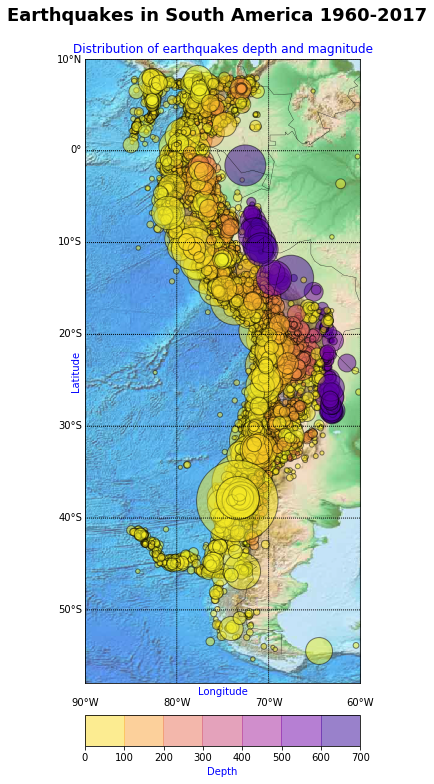

In [20]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [6,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Title for whole figure:
plt.suptitle('Earthquakes in South America 1960-2017', fontsize=18, fontweight='bold')

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(dataFrame["longitude"].values, dataFrame["latitude"].values)
plot = plt.scatter(lon1, lat1, s=0.0001*dataFrame["mag"]**8, c=dataFrame["depth"], cmap='plasma_r', alpha=0.5, edgecolors='black')

# Set grid and parallels and meridians:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Distribution of earthquakes depth and magnitude', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 7)
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(0, 700, 8)
plot.set_clim(0, 700)
# Make white background box for colorbar / legend:
#cbbox = inset_axes(ax, '27%', '35%', loc = 6, borderpad=0.9)
#[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
#cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
#cbbox.set_facecolor([1,1,1,0.7])
#axins1 = inset_axes(ax, width="10%", height="30%", loc=6, borderpad=2)

#Make colorbar - specify where it's dispalyed with location, pad = space between figure and bar, include boundaries:
cbar = m.colorbar(cmap=cmap, ticks=[0, 100, 200, 300, 400, 500, 600, 700], boundaries=bounds, location='bottom', pad="5%")
# Colorbar title:
cbar.set_label('Depth', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Make space between main title and plots:   
plt.subplots_adjust(top=0.92)
    
# Save figure as picture:
plotFile = str('mixed') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


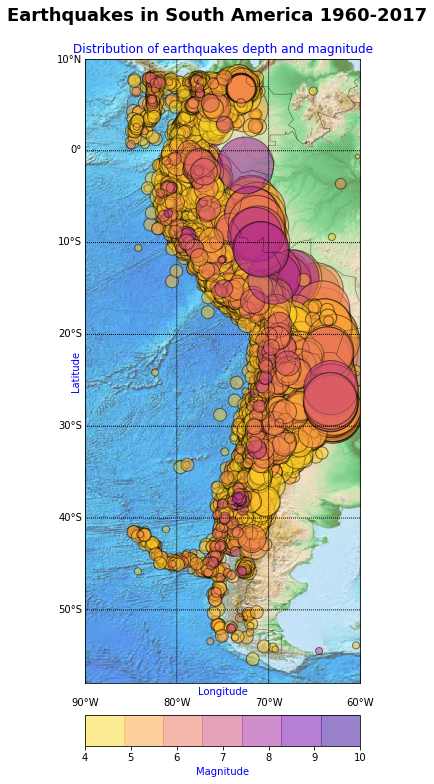

In [22]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [6,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Title for whole figure:
plt.suptitle('Earthquakes in South America 1960-2017', fontsize=18, fontweight='bold')

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(dataFrame["longitude"].values, dataFrame["latitude"].values)
plot = plt.scatter(lon1, lat1, s=5*dataFrame["depth"], c=dataFrame["mag"], cmap='plasma_r', alpha=0.5, edgecolors='black')

# Set grid and parallels and meridians:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Distribution of earthquakes depth and magnitude', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 7)
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(4, 10, 8)
plot.set_clim(4, 10)
# Make white background box for colorbar / legend:
#cbbox = inset_axes(ax, '27%', '35%', loc = 6, borderpad=0.9)
#[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
#cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
#cbbox.set_facecolor([1,1,1,0.7])
#axins1 = inset_axes(ax, width="10%", height="30%", loc=6, borderpad=2)

#Make colorbar - specify where it's dispalyed with location, pad = space between figure and bar, include boundaries:
cbar = m.colorbar(cmap=cmap, ticks=[4, 5, 6, 7, 8, 9, 10], boundaries=bounds, location='bottom', pad="5%")
# Colorbar title:
cbar.set_label('Magnitude', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Make space between main title and plots:   
plt.subplots_adjust(top=0.92)
    
# Save figure as picture:
plotFile = str('mixed1') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


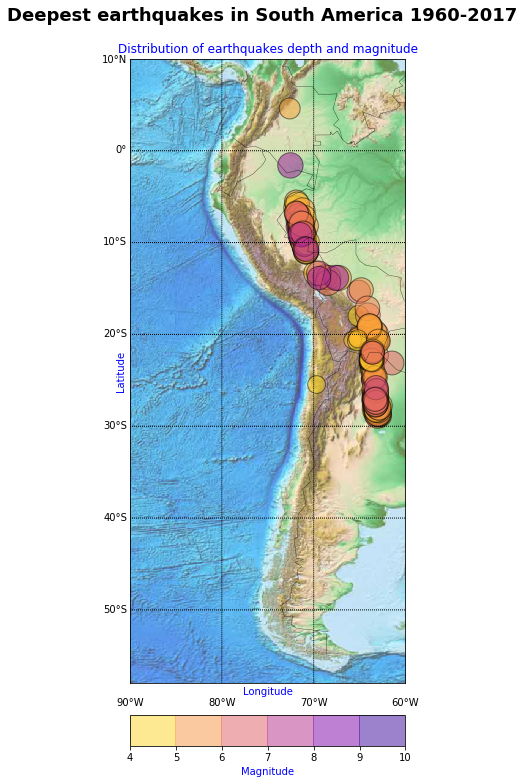

In [50]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [6,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Title for whole figure:
plt.suptitle('Deepest earthquakes in South America 1960-2017', fontsize=18, fontweight='bold')

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(dataFrame["longitude"].values, dataFrame["latitude"].values)
plot = plt.scatter(lon1, lat1, s=dataFrame["Deepest"], c=dataFrame["mag"], cmap='plasma_r', alpha=0.5, edgecolors='black')

# Set grid and parallels and meridians:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Distribution of earthquakes depth and magnitude', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 7)
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(4, 10, 7)
plot.set_clim(4, 10)
# Make white background box for colorbar / legend:
#cbbox = inset_axes(ax, '27%', '35%', loc = 6, borderpad=0.9)
#[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
#cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
#cbbox.set_facecolor([1,1,1,0.7])
#axins1 = inset_axes(ax, width="10%", height="30%", loc=6, borderpad=2)

cbar = m.colorbar(cmap=cmap, boundaries=bounds, location='bottom', pad="5%")
# Colorbar title:
cbar.set_label('Magnitude', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Make space between main title and plots:   
plt.subplots_adjust(top=0.92)
    
# Save figure as picture:
plotFile = str('mixed2') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

In [31]:
dataFrame['Mag over 6'] = dataFrame['mag'].loc[(dataFrame['mag'] >= 6.0) & (dataFrame['mag'] <= 10)]

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


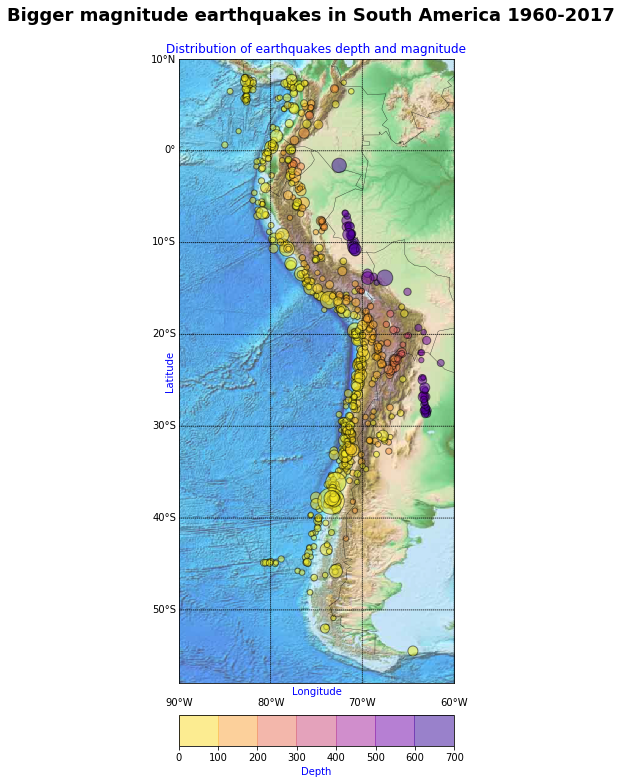

In [49]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams['figure.figsize'] = [6,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Title for whole figure:
plt.suptitle('Bigger magnitude earthquakes in South America 1960-2017', fontsize=18, fontweight='bold')

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(dataFrame["longitude"].values, dataFrame["latitude"].values)
plot = plt.scatter(lon1, lat1, s=0.0001*dataFrame['Mag over 6']**7, c=dataFrame["depth"], cmap='plasma_r', alpha=0.5, edgecolors='black')

# Set grid and parallels and meridians:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Distribution of earthquakes depth and magnitude', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 7)
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(0, 700, 8)
plot.set_clim(0, 700)
# Make white background box for colorbar / legend:
#cbbox = inset_axes(ax, '27%', '35%', loc = 6, borderpad=0.9)
#[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
#cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
#cbbox.set_facecolor([1,1,1,0.7])
#axins1 = inset_axes(ax, width="10%", height="30%", loc=6, borderpad=2)

cbar = m.colorbar(cmap=cmap, boundaries=bounds, location='bottom', pad="5%")
# Colorbar title:
cbar.set_label('Depth', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Make space between main title and plots:   
plt.subplots_adjust(top=0.92)
    
# Save figure as picture:
plotFile = str('mixed3') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

## Mixed magnitude + depth map and bars version

In [7]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [12,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set up figure for subplots:
f, ax = plt.subplots(nrows=1, ncols=2)

# Title for whole figure:
plt.suptitle('Earthquakes in South America 1960-2017', fontsize=18, fontweight='bold')

## Set up for bar plot:
# Make a bar every 2 degrees latitude:
barIncrement = 2
barBins= np.arange(8, -56, -barIncrement)
# Determine the length of bars:
numBars = len(barBins)
# Separate different depth earthquakes:
deep1Count = np.zeros(numBars)
deep2Count = np.zeros(numBars)
deep3Count = np.zeros(numBars)
deep4Count = np.zeros(numBars)
        
# Make bar plot (load values):
for i in range(numBars):
           
            numDeep1 = dataFrame['300'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            deep1Count[i] = deep1Count[i] + numDeep1
            
            numDeep2 = dataFrame['400'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            deep2Count[i] = deep2Count[i] + numDeep2
            
            numDeep3 = dataFrame['500'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            deep3Count[i] = deep3Count[i] + numDeep3
            
            numDeep4 = dataFrame['600'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            deep4Count[i] = deep4Count[i] + numDeep4

# Plot bars:
ax[0].barh(y=barBins-(barIncrement/2), width=deep1Count, label='300 - 399 km', color='orange', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=deep2Count, left=deep1Count, label='400 - 499 km', color='red', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=deep3Count, left=deep1Count+deep2Count, label='500 - 599 km', color='g', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=deep4Count, left=deep1Count+deep2Count+deep3Count, label='600 - 650 km', color='b', alpha = 0.4)

# Set limits:
totalCount = deep1Count + deep2Count + deep3Count + deep4Count
fewQuakes = 60
if totalCount.max() < fewQuakes:
            ax[0].set_xlim(fewQuakes,0)
            ax[0].set_xticks(np.arange(0,fewQuakes+1,10))
            ax[0].set_xlabel('Number of earthquakes', color='blue')

# Add grid:
ax[0].grid(axis='x')

# Add titles:
ax[0].set_title('Distribution of earthquakes', color='blue')
#ax.set_xlabel('Number of earthquakes', color='blue')
#ax[0].ylabel('Latitude', color='blue')

# Add legend and set location:
ax[0].legend(loc = 3, title='Depth (km)')

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(dataFrame["longitude"].values, dataFrame["latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=0.0001*dataFrame["depth"]**8, c=dataFrame["mag"], cmap='plasma_r', alpha=0.5, edgecolors='black')

# Set grid and parallels and meridians:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,5.)
meridians = np.arange(10.,351.,5.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Distribution of earthquakes depth and magnitude', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 7)
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(4, 10, 7)
plot1.set_clim(4, 10)
# Make white background box for colorbar / legend:
cbbox = inset_axes(ax[1], '27%', '35%', loc = 6, borderpad=0.9)
[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
cbbox.set_facecolor([1,1,1,0.7])
axins1 = inset_axes(ax[1], width="10%", height="30%", loc=6, borderpad=2)
#Make colorbar - specify where it's dispalyed with location, pad = space between figure and bar, include boundaries:
cbar = plt.colorbar(cax=axins1, cmap=cmap, orientation="vertical", boundaries=bounds)
# Colorbar title:
cbar.set_label('Magnitude', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Make space between main title and plots:   
plt.subplots_adjust(top=0.92)
    
# Save figure as picture:
plotFile = str('mixed4') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


KeyboardInterrupt: 

### All deepest by depth and bars

In [ ]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [12,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set up figure for subplots:
f, ax = plt.subplots(nrows=1, ncols=2)

# Title for whole figure:
plt.suptitle('Deepest earthquakes in South America 1960-2017', fontsize=18, fontweight='bold')

## Set up for bar plot:
# Make a bar every 2 degrees latitude:
barIncrement = 2
barBins= np.arange(8, -56, -barIncrement)
# Determine the length of bars:
numBars = len(barBins)
# Separate different depth earthquakes:
deep1Count = np.zeros(numBars)
deep2Count = np.zeros(numBars)
deep3Count = np.zeros(numBars)
deep4Count = np.zeros(numBars)
        
# Make bar plot (load values):
for i in range(numBars):
           
            numDeep1 = dataFrame['300'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            deep1Count[i] = deep1Count[i] + numDeep1
            
            numDeep2 = dataFrame['400'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            deep2Count[i] = deep2Count[i] + numDeep2
            
            numDeep3 = dataFrame['500'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            deep3Count[i] = deep3Count[i] + numDeep3
            
            numDeep4 = dataFrame['600'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            deep4Count[i] = deep4Count[i] + numDeep4

# Plot bars:
ax[0].barh(y=barBins-(barIncrement/2), width=deep1Count, label='300 - 399 km', color='orange', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=deep2Count, left=deep1Count, label='400 - 499 km', color='red', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=deep3Count, left=deep1Count+deep2Count, label='500 - 599 km', color='g', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=deep4Count, left=deep1Count+deep2Count+deep3Count, label='600 - 650 km', color='b', alpha = 0.4)

# Set limits:
totalCount = deep1Count + deep2Count + deep3Count + deep4Count
fewQuakes = 60
if totalCount.max() < fewQuakes:
            ax[0].set_xlim(fewQuakes,0)
            ax[0].set_xticks(np.arange(0,fewQuakes+1,10))
            ax[0].set_xlabel('Number of earthquakes', color='blue')

# Add grid:
ax[0].grid(axis='x')

# Add titles:
ax[0].set_title('Distribution of deepest earthquakes', color='blue')
#ax.set_xlabel('Number of earthquakes', color='blue')
#ax[0].ylabel('Latitude', color='blue')

# Add legend and set location:
ax[0].legend(loc = 3, title='Depth (km)')

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Determine custom colors on colorbar:
cmap = mpl.colors.ListedColormap(['orange','red','g','b'])

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(dataFrame["longitude"].values, dataFrame["latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=dataFrame["Deepest"], cmap=cmap, alpha=0.5)

# Set grid and parallels and meridians:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Distribution of earthquakes and depth', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(300, 700, 5)
plot1.set_clim(300, 700)
# Make white background box for colorbar / legend:
cbbox = inset_axes(ax[1], '27%', '35%', loc = 6, borderpad=0.9)
[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
cbbox.set_facecolor([1,1,1,0.7])
axins1 = inset_axes(ax[1], width="10%", height="30%", loc=6, borderpad=2)
#Make colorbar - specify where it's dispalyed with location, pad = space between figure and bar, include boundaries:
cbar = plt.colorbar(cax=axins1, cmap=cmap, orientation="vertical", boundaries=bounds)
# Colorbar title:
cbar.set_label('Depth (km)', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Make space between main title and plots:   
plt.subplots_adjust(top=0.92)
    
# Save figure as picture:
plotFile = str('Deepest_eq') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

# For animations:

### Deepest only -looping- (Map and bars) 

In [ ]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set figure size:
plt.rcParams['figure.figsize'] = [12,12]

# Set up for bar plot:
# Make a bar every 2 degrees latitude:
barIncrement = 2
barBins= np.arange(8, -56, -barIncrement)
# Determine the length of bars:
numBars = len(barBins)
# Separate different depth earthquakes:
deep1Count = np.zeros(numBars)
deep2Count = np.zeros(numBars)
deep3Count = np.zeros(numBars)
deep4Count = np.zeros(numBars)

# For running value text box with month and year, assing names for values for 'months':
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Select time range: first line years, second line months:
for year in range(1960, 2018):
    for month in range(1, 13):
        currentMonth = str(month)+"-"+str(year)
        selectedMonth = dataFrame[currentMonth:]

# Set up figure for subplots:
        f, ax = plt.subplots(nrows=1, ncols=2)

# Title for whole figure:
        plt.suptitle('Deep earthquakes in South America 1960-2017', fontweight='bold')
        
# Make bar plot (set axis, load values):
        for i in range(numBars):
            
            numDeep1 = selectedMonth['300'].loc[(selectedMonth['latitude'] > barBins[i]-barIncrement) & (selectedMonth['latitude'] <= barBins[i])].count()
            deep1Count[i] = deep1Count[i] + numDeep1
            
            numDeep2 = selectedMonth['400'].loc[(selectedMonth['latitude'] > barBins[i]-barIncrement) & (selectedMonth['latitude'] <= barBins[i])].count()
            deep2Count[i] = deep2Count[i] + numDeep2
            
            numDeep3 = selectedMonth['500'].loc[(selectedMonth['latitude'] > barBins[i]-barIncrement) & (selectedMonth['latitude'] <= barBins[i])].count()
            deep3Count[i] = deep3Count[i] + numDeep3
            
            numDeep4 = selectedMonth['600'].loc[(selectedMonth['latitude'] > barBins[i]-barIncrement) & (selectedMonth['latitude'] <= barBins[i])].count()
            deep4Count[i] = deep4Count[i] + numDeep4

# Plot bars:
        ax[0].barh(y=barBins-(barIncrement/2), width=deep1Count, label='300 - 399 km', color='r', alpha = 0.4)
        ax[0].barh(y=barBins-(barIncrement/2), width=deep2Count, left=deep1Count, label='400 - 499 km', color='y', alpha = 0.4)
        ax[0].barh(y=barBins-(barIncrement/2), width=deep3Count, left=deep1Count+deep2Count, label='500 - 599 km', color='g', alpha = 0.4)
        ax[0].barh(y=barBins-(barIncrement/2), width=deep4Count, left=deep1Count+deep2Count+deep3Count, label='600 - 650 km', color='b', alpha = 0.4)

# Set limits:
        totalCount = deep1Count + deep2Count + deep3Count + deep4Count
        fewQuakes = 60
        if totalCount.max() < fewQuakes:
            ax[0].set_xlim(fewQuakes,0)
            ax[0].set_xticks(np.arange(0,fewQuakes+1,10))
            ax[0].set_xlabel('Number of earthquakes', color='blue')

# Add grid:
        ax[0].grid(axis='x')

# Add titles:
        ax[0].set_title('Deepest earthquakes according to depth (km)', color='blue')
        ax[0].set_ylabel('Latitude', color='blue')

# Add legend and set location:
        ax[0].legend(loc = 3, title='Depth (km)')

# Make map figure on the right side of the barplot to plot earthquake locations and magnitudes        
# Setup Lambert Conformal basemap
# Set resolution=None to skip processing of boundary datasets
        m = Basemap(width=4000000,height=9000000,projection='cyl',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
            llcrnrlon=-90,urcrnrlon=-60)    

# If you want to have borders or shoreline take off #
        #m.drawcountries()
        #m.drawcoastlines()

# Import topography map - to change colour intensity set alpha to wanted level        
        #m.etopo(alpha=0.75)
        m.arcgisimage(service='World_Physical_Map')

# Set axis:
        lon,lat = m(selectedMonth["longitude"].values, selectedMonth["latitude"].values)

# Make scatter plot. s=size of points, c=color, cmap determines chosen colorbar colors, alpha makes points less opaque, edgecolors determines the color of point edges        
        plot1 = plt.scatter(lon, lat, s=0.0001*selectedMonth["Deepest"]**2, c=selectedMonth["Deepest"], cmap='plasma_r', alpha=0.5, edgecolors='black')

# Set grid for parallels and meridians:
        x, y = m(*np.meshgrid(lon,lat))
        parallels = np.arange(-80.,81.,10.)
        meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
        m.drawparallels(parallels,labels=[True,False,True,True])
        m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles & labels:
        ax[1].set_title('Deep earthquake locations in {0:d}'.format(year), color='blue')
        ax[1].set_xlabel('Longitude', color='blue')
        ax[1].set_ylabel('Latitude', color='blue')

# Determine colors:
        cmap = mpl.colors.ListedColormap(['r','y','g','b'])

# Specify colorbar:
        #cmap = cm.get_cmap('plasma', 7)
        bounds = np.linspace(300, 700, 5)
        plot1.set_clim(300, 700)
        cbbox = inset_axes(ax[1], '27%', '35%', loc = 6, borderpad=0.9)
        [cbbox.spines[k].set_visible(False) for k in cbbox.spines]
        cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
        cbbox.set_facecolor([1,1,1,0.7])
        axins1 = inset_axes(ax[1], width="10%", height="30%", loc=6, borderpad=2)
        cbar = plt.colorbar(cax=axins1, cmap=cmap, orientation="vertical", boundaries=bounds)
        cbar.set_label('Depth (km)', color='blue')

# Print month and year onto figure:
# Note: We first need to convert the lon, lat to the projected values:
        textLon, textLat = m(-88.5, -38)
        ax[1].text(textLon, textLat, months[month]+" "+str(year), fontsize=15,
        bbox={'facecolor':'white', 'edgecolor':'none', 'alpha':0.7, 'pad':5})

# Make plots fill whole figure:
        #plt.tight_layout(w_pad=10)

# Make space between main title and plots:
        plt.subplots_adjust(top=0.94)

# Set path for saving images:
        savepath="/Users/Nellimetiainen/Desktop/a/"

# Save figure as picture:
        plotFile = str(year) + "-" + str(month)+ "deepest" + ".png"
        plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
        plt.close("all")